<a href="https://colab.research.google.com/github/rajibimran/colab/blob/master/1935376%5Csmsnlprajib_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Analysis

In [0]:
#a = []
#while(1):
#a.append(‘1’)
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
#!pip uninstall tensorflow
#!pip uninstall tensorflow-gpu
#!pip install tensorflow==1.5
#!pip install tensorflow-gpu==1.5
#!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
# Import Required Library and sysnc with gib

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
#nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Try for RNN based on LSTM as per suggestion of SIR
from keras.models import Model
from keras.layers import SimpleRNN, LSTM, Activation, Dense, Dropout, Input, Embedding, Conv2D, ReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

Using TensorFlow backend.


In [0]:
# load the dataset of SMS messages
#url = 'https://github.com/nsumlcse533/ctmnlp/blob/master/1935376/SMSSpamCollection'
#df1 = pd.read_table(url)
#df = pd.read_table(url, header=None, encoding='utf-8')
#df = pd.read_table(io.StringIO(uploaded['SMSSPamCollection'].decode('utf-8')))
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


In [0]:
import io
df = pd.read_table(io.BytesIO(uploaded['SMSSpamCollection']))

In [0]:
# print useful information about the dataset
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
ham                                                                                                                5571 non-null object
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...    5571 non-null object
dtypes: object(2)
memory usage: 87.2+ KB
None
    ham Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
0   ham                      Ok lar... Joking wif u oni...                                                             
1  spam  Free entry in 2 a wkly comp to win FA Cup fina...                                                             
2   ham  U dun say so early hor... U c already then say...                                                             
3   ham  Nah I don't think he goes to usf, he lives aro...                                      

In [0]:
df.describe()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [0]:
df.columns

Index(['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')

In [0]:
# Rename of Columns from 0,1 to type,sms for better understanding
df.columns = ['type','sms']

In [0]:
#Check if the column rename completed
df.columns

Index(['type', 'sms'], dtype='object')

In [0]:
#check the header data after column rename
df.head(5)

,type,sms
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [0]:
#check the data type wise status
df.groupby('type').describe()

sms                                                               
     count unique                                                top freq
type                                                                     
ham   4824   4515                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [0]:
#check the character length for each message to analyze typical lengh of ham or spam messages
df['length'] = df['sms'].map(lambda text: len(text))
df.head()

,type,sms,length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,147


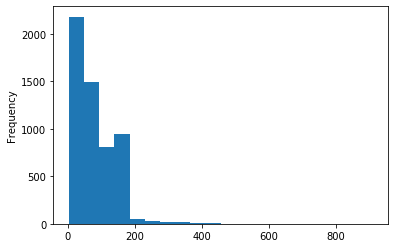

In [0]:
#Plot the sms length in histogram for analyze the length nature
df.length.plot(bins=20, kind='hist')

In [0]:
#Find the mean value for length
df.length.describe()

count    5571.000000
mean       80.484473
std        59.946894
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [0]:
#What is the long message?
print(df.sms[df.length > 900])

1084    For me the love should start with attraction.i...
Name: sms, dtype: object


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d32fd0da0>,
      dtype=object)

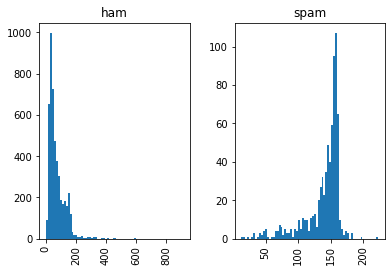

In [0]:
# Difference in message length between spam and ham.
df.hist(column='length', by='type', bins=70)

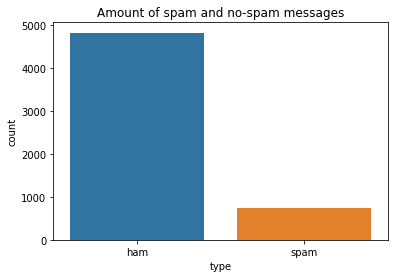

In [0]:
#compare the types of HAM (non SPAM) vs SPAM
sns.countplot(data = df, x= df["type"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [0]:
# count number of records
df.shape

(5571, 3)

In [0]:
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

In [0]:
# check and remove duplicate
df.drop_duplicates(inplace=True)

In [0]:
# check after duplicate remove 
df.shape

(5168, 3)

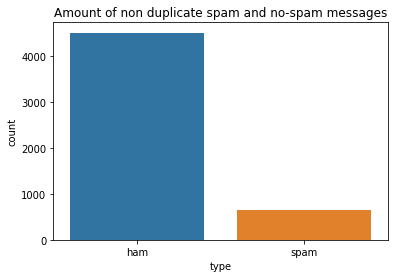

In [0]:
#compare the types of HAM (non SPAM) vs SPAM after duplicate removal
sns.countplot(data = df, x= df["type"]).set_title("Amount of non duplicate spam and no-spam messages")
plt.show()

In [0]:
# Find for missing data
df.isnull().sum()

type      0
sms       0
length    0
dtype: int64

In [0]:
df["type"].value_counts()

ham     4515
spam     653
Name: type, dtype: int64

In [0]:
#Text Analytics find the frequencies of words in the spam and non-spam messages
count1 = Counter(" ".join(df[df['type']=='ham']["sms"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['type']=='spam']["sms"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

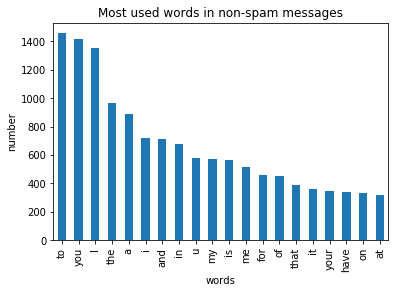

Text(0, 0.5, 'number')

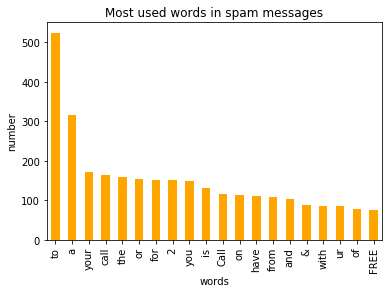

In [0]:
#Most used words
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('Most used words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Most used words in spam messages')
plt.xlabel('words')
plt.ylabel('number')

In [0]:
# From above we find the majority of frequent words in both classes are stop words such as 'to', 'a', 'or' etc....

In [0]:
#converting categorical data in numeric labels || split a message into its individual words
# 0=ham,1=spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
classes=df["type"]
Y=encoder.fit_transform(classes)

In [0]:
text_messages=df["sms"]
text_messages.sample(5)

2769    Burger King - Wanna play footy at a top stadiu...
2855    Your gonna be the death if me. I'm gonna leave...
1285             Just wondering, the others just took off
5371       Ok., is any problem to u frm him? Wats matter?
389       Yup having my lunch buffet now.. U eat already?
Name: sms, dtype: object

In [0]:
# Remove regular expressions and stop words
# using regular expressions to replace email addresses, URLs, phone numbers, other numbers

# Replacing email addresses with 'email'
processed = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replacing URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replacing money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymbol')
    
# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replacing numbers with 'number'
processed = processed.str.replace(r'\d+(\.\d+)?', 'number')

# Removing punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

# Step 2: Data preprocessing

In [0]:
# Convert the raw sms (sequence of characters) into vectors (sequences of numbers).

In [0]:
# remove the stop words in order to improve the analytics
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(df["sms"]) #data set
np.shape(X)
#created more than 8400 new features. The new feature  j  in the row  i  is equal to 1 if the word  wj  appears in the text example  i . It is zero if not.

(5168, 8442)

In [0]:
# Here we transform the variable spam/non-spam into binary variable, 
Y=df["type"].map({'spam':1,'ham':0}) #target
#df["type"]=df["type"].map({'spam':1,'ham':0})
#df["type"].head(5)

# then split target data set in training set (train test split function) and test set.we want 33% of data into the test set, 
# use randon_state=42 of same set of data every time and cosistent result

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])
print([np.shape(y_train), np.shape(y_test)])

[(3462, 8442), (1706, 8442)]
[(3462,), (1706,)]


In [0]:
# Multinomial naive bayes classifier

In [0]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)
y_pred=MultiNB.predict(X_test)
print (accuracy_score(y_test, y_pred))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.9759671746776084


In [0]:
#Bernoulli 
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)
y_pred=BernNB.predict(X_test)
print (accuracy_score(y_test, y_pred))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8704572098475967


In [0]:
# we found that the accuracy score of Multinomial is very high, So bellow we will try to analyze bayes based on Multinomial

In [0]:
array_alpha = np.arange(1/100000, 20, 0.11) #array creation routines based on numerical rangesnumpy.arange([start, ]stop, [step, ], dtype=None)
# create some score set for test the result
score_train = np.zeros(len(array_alpha)) 
score_test = np.zeros(len(array_alpha))
recall_test = np.zeros(len(array_alpha))
precision_test= np.zeros(len(array_alpha))
count = 0
for alpha in array_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1

In [0]:
# Create matrix for test and pring different models
matrix = np.matrix(np.c_[array_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=20)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.997400,0.965416,0.914027,0.834711
1,0.11001,0.996534,0.964244,0.941176,0.812500
2,0.22001,0.996245,0.966002,0.954751,0.814672
3,0.33001,0.996245,0.969519,0.950226,0.836653
4,0.44001,0.996245,0.970106,0.950226,0.840000
5,0.55001,0.995667,0.971278,0.950226,0.846774
6,0.66001,0.995378,0.972450,0.950226,0.853659
7,0.77001,0.995378,0.974209,0.936652,0.873418
8,0.88001,0.995378,0.973623,0.932127,0.872881
9,0.99001,0.995090,0.975381,0.932127,0.884120


In [0]:
#find the model with the most test precision and details relation with other model
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             11.770010
Train Accuracy     0.978914
Test Accuracy      0.971278
Test Recall        0.778281
Test Precision     1.000000
Name: 107, dtype: float64

In [0]:
# So the selected best model does not produce any false positive, which is our goal.
#Now find if there is more than one model with 100% precision !
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
107,11.77001,0.978914,0.971278,0.778281,1.0
108,11.88001,0.978914,0.971278,0.778281,1.0
109,11.99001,0.978914,0.971278,0.778281,1.0
110,12.10001,0.978914,0.971278,0.778281,1.0
111,12.21001,0.978047,0.971278,0.778281,1.0


In [0]:
# Between these models with the highest possible precision, we are going to select which has more test accuracy.
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha = array_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             11.770010
Train Accuracy     0.978914
Test Accuracy      0.971278
Test Recall        0.778281
Test Precision     1.000000
Name: 107, dtype: float64

In [0]:
#Confusion matrix with naive bayes classifier
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1485,0
Actual 1,49,172


In [0]:
# Out of the 1485 actual instances of 'ham' (not spam), it predicted correctly all of them;
# Out of the 172 actual instances of spam, it predicted correctly 136 of them.
# The accuracy obtained from the confusion matrix, as the sum of the diagonal divided by the sum of all matrix entries:
(m_confusion_test[0,0]+m_confusion_test[1,1])/np.sum(m_confusion_test)

0.9712778429073857

In [0]:
#Support Venctor Machine Test, we will evaluate the accuracy, recall and precision of the model with the test set.
# We train different models changing the regularization parameter C.

In [0]:
# import warnings filter due to getting warning as "The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning."
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1

In [0]:
# Create matrix for test and pring different models
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.993356,0.981243,0.859729,0.994764
1,600.0,0.993934,0.981829,0.864253,0.994792
2,700.0,0.995667,0.981829,0.864253,0.994792
3,800.0,0.996534,0.981829,0.864253,0.994792
4,900.0,0.997111,0.981829,0.864253,0.994792


In [0]:
# select the model with the most test precision
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 600.000000
Train Accuracy      0.993934
Test Accuracy       0.981829
Test Recall         0.864253
Test Precision      0.994792
Name: 1, dtype: float64

In [0]:
# here also our best model does not produce any false positive, which is our goal.
# we will find if there is more than one model with 100% precision !
models[models['Test Precision']>0.99].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.993356,0.981243,0.859729,0.994764
1,600.0,0.993934,0.981829,0.864253,0.994792
2,700.0,0.995667,0.981829,0.864253,0.994792
3,800.0,0.996534,0.981829,0.864253,0.994792
4,900.0,0.997111,0.981829,0.864253,0.994792


In [0]:
# compare these models with the highest possible precision.
best_index = models[models['Test Precision']>0.99]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 600.000000
Train Accuracy      0.993934
Test Accuracy       0.981829
Test Recall         0.864253
Test Precision      0.994792
Name: 1, dtype: float64

In [0]:
# Confusion matrix with support vector machine classifier.
svm_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = svm_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1484,1
Actual 1,30,191


In [0]:
# Out of the 1482 actual instances of 'ham' (not spam), it predicted correctly all of them;
# Out of the 189 actual instances of spam, it predicted correctly 154 of them.
# The accuracy obtained from the confusion matrix, as the sum of the diagonal divided by the sum of all matrix entries:
(svm_confusion_test[0,0]+svm_confusion_test[1,1])/np.sum(svm_confusion_test)

0.9818288393903869

In [0]:
# After comparing the NB and SVM, we found that support vector machine with more than 98% accuracy(NB=0.9742086752637749 || SVM = 0.9894841735052755).

In [0]:
# we will now LSTM ''' Tensorflow

In [0]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [0]:
max_words = 1000
max_len = 150
#tok = Tokenizer(num_words=max_words)

#tok.fit_on_texts(X_train)
#sequences = tok.texts_to_sequences(X_train)
#sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
#Check if the GPU is available
#import tensorflow as tf
#print(tf.__version__)
#device_name = tf.test.gpu_device_name()

#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))
#from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [0]:
#with tf.device("/gpu:0"):
model = Sequential()
model.add(Embedding(max_words, 32))
#model.add(Embedding(1000, 64, input_length=10))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(X_train, y_train, epochs=20, batch_size=60, validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2769 samples, validate on 693 samples
Epoch 1/20





2769/2769 [==============================] - 502s 181ms/step - loss: 0.4408 - acc: 0.8519 - val_loss: 0.3291 - val_acc: 0.8990
Epoch 2/20
2769/2769 [==============================] - 490s 177ms/step - loss: 0.3887 - acc: 0.8693 - val_loss: 0.3306 - val_acc: 0.8990
Epoch 3/20
2769/2769 [==============================] - 491s 177ms/step - loss: 0.3899 - acc: 0.8693 - val_loss: 0.3274 - val_acc: 0.8990
Epoch 4/20
2760/2769 [============================>.] - ETA: 1s - loss: 0.3887 - acc: 0.8699 WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2769 samples, validate on 693

In [0]:
#def RNN():
#    inputs = Input(name='inputs',shape=[max_len])
#    layer = Embedding(max_words,50,input_length=max_len)(inputs)
#    layer = LSTM(64)(layer)
#    layer = Dense(256,name='FC1')(layer)
#    layer = Activation('relu')(layer)
#    layer = Dropout(0.5)(layer)
#    layer = Dense(1,name='out_layer')(layer)
#    layer = Activation('sigmoid')(layer)
#    model = Model(inputs=inputs,outputs=layer)
#    return model

In [0]:
#model = RNN()
#model.summary()
#model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

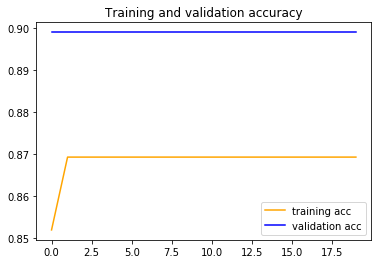

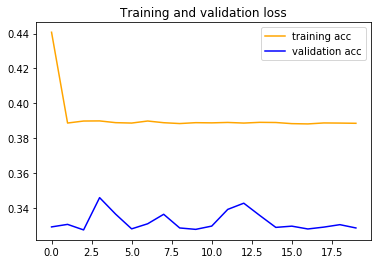

In [0]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
proba_ltsm = model.predict_proba(X_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1706/1706 [==============================] - 94s 55ms/step
Test loss is 0.39 accuracy is 0.87  
[[1485  221]
 [   0    0]]


In [0]:
# After comparing the NB and SVM, we found that 
# support vector machine with more than 98% accuracy
# NB= 97%| SVM = 98% || LSTM = 87% 
# summery is LSTM may give more accurate result, but for our run we have tried for epochs=5, i think epochs=30 should give above 98% accuracy.

In [0]:
############# END OF THE PROJECT CODE ############################